# Series

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
my_simple_series = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
my_simple_series

a   -3.110309
b   -0.487639
c    0.543584
d    0.172280
e    1.707252
dtype: float64

In [ ]:
my_simple_series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
my_dates_index = pd.date_range('20200101', periods=6)
my_dates_index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
sample_numpy_data = np.array(np.arange(24)).reshape((6,4))
sample_numpy_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

# Data frame

In [ ]:
sample_df = pd.DataFrame(sample_numpy_data, index=my_dates_index, columns=list('ABCD'))
sample_df

,A,B,C,D
2020-01-01,0,1,2,3
2020-01-02,4,5,6,7
2020-01-03,8,9,10,11
2020-01-04,12,13,14,15
2020-01-05,16,17,18,19
2020-01-06,20,21,22,23


In [ ]:
sample_df['C']

2020-01-01     2
2020-01-02     6
2020-01-03    10
2020-01-04    14
2020-01-05    18
2020-01-06    22
Freq: D, Name: C, dtype: int64

In [ ]:
sample_df['2020-01-01':'2020-01-04']

,A,B,C,D
2020-01-01,0,1,2,3
2020-01-02,4,5,6,7
2020-01-03,8,9,10,11
2020-01-04,12,13,14,15


In [ ]:
sample_df.loc[my_dates_index[1:3]]

,A,B,C,D
2020-01-02,4,5,6,7
2020-01-03,8,9,10,11


In [ ]:
sample_df[sample_df >= 11]

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,11.0
2020-01-04,12.0,13.0,14.0,15.0
2020-01-05,16.0,17.0,18.0,19.0
2020-01-06,20.0,21.0,22.0,23.0


In [ ]:
sample_df_2 = sample_df.copy()
sample_df_2['Fruits'] = ['apple', 'orange','banana','strawberry','blueberry','pineapple']
sample_df_2

,A,B,C,D,Fruits
2020-01-01,0,1,2,3,apple
2020-01-02,4,5,6,7,orange
2020-01-03,8,9,10,11,banana
2020-01-04,12,13,14,15,strawberry
2020-01-05,16,17,18,19,blueberry
2020-01-06,20,21,22,23,pineapple


In [ ]:
sample_df_2[sample_df_2['Fruits'].isin(['banana','pineapple', 'smoothy'])]

,A,B,C,D,Fruits
2020-01-03,8,9,10,11,banana
2020-01-06,20,21,22,23,pineapple


In [ ]:
##### isin function http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html

In [ ]:
#####  reindex http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html
#####  dropna  http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
#####  fillna  http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html


In [ ]:
sample_df_2.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,10.000000,11.000000,12.000000,13.000000
std,7.483315,7.483315,7.483315,7.483315
min,0.000000,1.000000,2.000000,3.000000
25%,5.000000,6.000000,7.000000,8.000000
50%,10.000000,11.000000,12.000000,13.000000
75%,15.000000,16.000000,17.000000,18.000000
max,20.000000,21.000000,22.000000,23.000000


In [ ]:
sample_df_2.mean()

A    10.0
B    11.0
C    12.0
D    13.0
dtype: float64

In [ ]:
sample_df_2.apply(np.cumsum, axis=0)

,A,B,C,D,Fruits
2020-01-01,0,1,2,3,apple
2020-01-02,4,6,8,10,appleorange
2020-01-03,12,15,18,21,appleorangebanana
2020-01-04,24,28,32,36,appleorangebananastrawberry
2020-01-05,40,45,50,55,appleorangebananastrawberryblueberry
2020-01-06,60,66,72,78,appleorangebananastrawberryblueberrypineapple


In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [ ]:
s.str.len()


0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

In [ ]:
pieces = [sample_df_2[:2], sample_df_2[2:4], sample_df_2[4:]]
new_list = pieces[0], pieces[2]
pd.concat(new_list)

,A,B,C,D,Fruits
2020-01-01,0,1,2,3,apple
2020-01-02,4,5,6,7,orange
2020-01-05,16,17,18,19,blueberry
2020-01-06,20,21,22,23,pineapple


In [ ]:
new_last_row = sample_df_2.iloc[2]
sample_df_2.append(new_last_row)


,A,B,C,D,Fruits
2020-01-01,0,1,2,3,apple
2020-01-02,4,5,6,7,orange
2020-01-03,8,9,10,11,banana
2020-01-04,12,13,14,15,strawberry
2020-01-05,16,17,18,19,blueberry
2020-01-06,20,21,22,23,pineapple
2020-01-03,8,9,10,11,banana


In [ ]:
left = pd.DataFrame({'my_key': ['K0', 'K1', 'K2', 'K3'],
 'A': ['A0', 'A1', 'A2', 'A3'],
 'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'my_key': ['K0', 'K1', 'K2', 'K3'],
 'C': ['C0', 'C1', 'C2', 'C3'],
 'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(left, right, on='my_key')
result

,my_key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data, wb

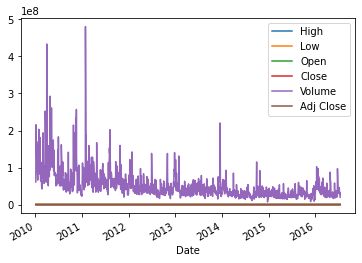

In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 7, 15)
yahoo_df = data.DataReader("F", 'yahoo', start, end)
yahoo_df.plot()

In [ ]:
yahoo_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,6.937616
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.396526
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,7.673220
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,7.868933
2010-01-08,11.74,11.46,11.67,11.69,130463000.0,7.889179


In [ ]:
yahoo_df.groupby('Close').sum()

,High,Low,Open,Volume,Adj Close
Close,,,,,
8.920000,9.030000,8.820000,8.990000,45326500.0,6.102611
8.960000,9.110000,8.830000,9.050000,51798900.0,6.096806
8.970000,9.200000,8.910000,9.170000,44338200.0,6.103609
9.000000,9.100000,8.880000,8.990000,67986800.0,6.124023
9.040000,9.420000,8.990000,9.290000,65973000.0,6.184709
...,...,...,...,...,...
18.650000,18.750000,18.580000,18.610001,50279400.0,12.586242
18.680000,18.969999,18.549999,18.809999,100459700.0,12.606486
18.700001,18.770000,18.610001,18.660000,39737500.0,12.619986


In [ ]:
#####   categorical data  http://pandas.pydata.org/pandas-docs/stable/categorical.html

In [ ]:
# a_df["level"].cat.categories = ["A", "B", "C", "D", "E"]

In [ ]:
#####  resampling  http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

In [ ]:
my_index = pd.date_range('1/1/2020', periods=9, freq='min')
my_series = pd.Series(np.arange(9), index=my_index)
my_series

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
Freq: T, dtype: int64

In [ ]:
my_series.resample('3min').sum()

2020-01-01 00:00:00     3
2020-01-01 00:03:00    12
2020-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [ ]:
my_series.resample('3min', label='right', closed='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:03:00     6
2020-01-01 00:06:00    15
2020-01-01 00:09:00    15
Freq: 3T, dtype: int64

In [ ]:
my_series.resample('30S').asfreq()[0:5] 

2020-01-01 00:00:00    0.0
2020-01-01 00:00:30    NaN
2020-01-01 00:01:00    1.0
2020-01-01 00:01:30    NaN
2020-01-01 00:02:00    2.0
Freq: 30S, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
now = datetime.now()
now

datetime.datetime(2020, 11, 21, 13, 14, 20, 656143)

In [ ]:
now.year, now.month, now.day

(2020, 11, 21)

In [ ]:
####  insert  http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.insert.html
####  panel   http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel
####  plots   http://pandas.pydata.org/pandas-docs/stable/visualization.html